# Stock Technical Analysis: Python Tutorial

Mass Index

Contact: andrewshamlet@gmail.com // @andrewshamlet

Python streamlines tasks requiring multiple steps in a single block of code. For this reason, it is a great tool for querying and performing analysis on data.

Last Tutorial, we outlined steps for calculating Commodity Channel Index (CCI).

In this Tutorial, we introduce a new technical indicator, the Mass Index.

Developed by Donald Dorsey, the Mass Index uses the high-low range to identify trend reversals based on range expansions. In this sense, the Mass Index is a volatility indicator that does not have a directional bias. Instead, the Mass Index identifies range bulges that can foreshadow a reversal of the current trend.

The Mass Index is calculated as follows:
    
        Single EMA = 9-period exponential moving average (EMA) of the high-low differential  

        Double EMA = 9-period EMA of the 9-period EMA of the high-low differential 

        EMA Ratio = Single EMA divided by Double EMA 

        Mass Index = 25-period sum of the EMA Ratio 

First, the Single EMA provides the average for the high-low range. 

Second, the Double EMA provides a second smoothing of this volatility measure. 

Using a ratio of these two exponential moving averages normalizes the data series. This ratio shows when the Single EMA becomes large relative to the Double EMA. 

The final step, a 25-period summation, acts like a moving average to further smooth the data series. 

Overall, the Mass Index rises as the high-low range widens and falls as the high-low range narrows. 

Donald Dorsey looked for “reversal bulges” to signal a trend reversal. According to Dorsey, a bulge occurs when the Mass Index moves above 27. This initial bulge does not complete the signal though. Dorsey waited for this bulge to reverse with a move back below 26.50. Once the reversal bulge is complete, traders should use other analysis techniques to determine the direction of the next move. Ideally, a downtrend followed by a reversal bulge would suggest a bullish trend reversal. Conversely, an uptrend followed by a reversal bulge would suggest a bearish trend reversal.

Let’s use Python to compute the Mass Index.

1.) Import modules.

In [2]:
import pandas as pd
import numpy as np
from pandas_datareader import data as web
import matplotlib.pyplot as plt
%matplotlib inline

2.a.) Define function for querying daily close.

In [3]:
def get_stock(stock,start,end):
     return web.DataReader(stock,'google',start,end)['Close']

2.b.) Define function for querying daily high.

In [4]:
def get_high(stock,start,end):
     return web.DataReader(stock,'google',start,end)['High']

2.c.) Define function for querying daily low.

In [5]:
def get_low(stock,start,end):
     return web.DataReader(stock,'google',start,end)['Low']

3.) Define function for Mass Index.

In [6]:
def MassIndex(high, low):  
    Range = high - low  
    EX1 = pd.ewma(Range, span = 9, min_periods = 8)  
    EX2 = pd.ewma(EX1, span = 9, min_periods = 8)  
    Mass = EX1 / EX2  
    MassIndex = pd.Series(pd.rolling_sum(Mass, 25), name = 'Mass Index')  
    return MassIndex

How does the Mass Index function work?

3.a.) Function calculates the difference between the high and the low, and sets this value to variable Range.

In [7]:
#Range = high - low  

3.b.) Function takes a 9 period Exponential Moving Average of the Range, and sets this value to variable EX1.

In [8]:
#EX1 = pd.ewma(Range, span = 9, min_periods = 8)  

3.c.) Function takes a 9 period Exponential Moving Average of the EX1, to smooth volatility, and sets this value to variable EX2. 

In [9]:
#EX2 = pd.ewma(EX1, span = 9, min_periods = 8)  

3.d.) Function takes the ratio of EX1 to EX2, and sets this value to variable Mass. 

In [10]:
#Mass = EX1 / EX2  

3.e.) Function calculates the 25 period rolling sum of Mass, and sets this value to variable MassIndex. 

In [11]:
#MassIndex = pd.Series(pd.rolling_sum(Mass, 25), name = 'Mass Index')  

3.f.) Function returns MassIndex.

In [12]:
#return MassIndex

4.) Query daily close, high, and low for ‘FB’ during 2016.

In [13]:
df = pd.DataFrame(get_stock('FB', '1/1/2016', '12/31/2016'))
df['High'] = get_high('FB', '1/1/2016', '12/31/2016')
df['Low'] = get_low('FB', '1/1/2016', '12/31/2016')

5.) Run daily high and low through Mass Index function. Save series to new column in dataframe. 

In [14]:
df['MassIndex'] = MassIndex(df['High'], df['Low'])
df.tail()

,Close,High,Low,MassIndex
Date,,,,
2016-12-23,117.27,117.56,116.30,22.922974
2016-12-27,118.01,118.68,116.86,22.857517
2016-12-28,116.92,118.25,116.65,22.743369
2016-12-29,116.35,117.53,116.06,22.690799
2016-12-30,115.05,116.83,114.77,22.770264


6.) Plot daily close and Mass Index.

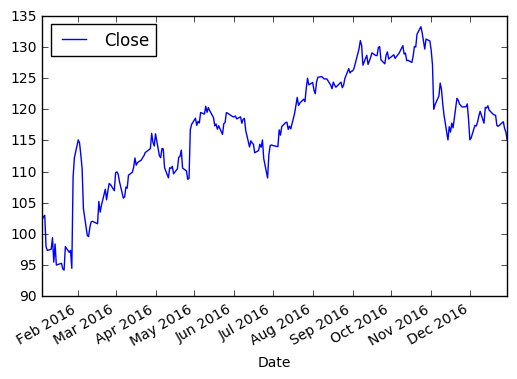

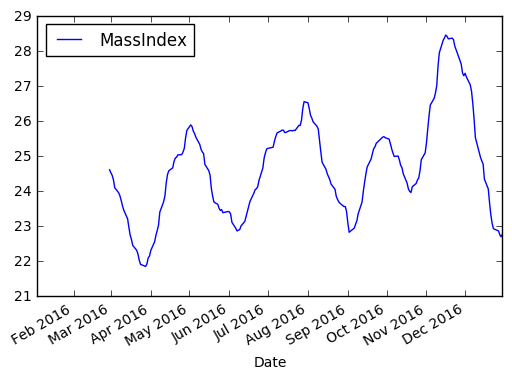

In [15]:
df.plot(y=['Close'])
df.plot(y=['MassIndex'])

There you have it! We created our Mass Index indicator. Here’s the full code:

In [16]:
import pandas as pd
import numpy as np
from pandas_datareader import data as web
import matplotlib.pyplot as plt
%matplotlib inline

def get_stock(stock,start,end):
     return web.DataReader(stock,'google',start,end)['Close']
    
def get_high(stock,start,end):
     return web.DataReader(stock,'google',start,end)['High']
    
def get_low(stock,start,end):
     return web.DataReader(stock,'google',start,end)['Low']
    
def MassIndex(high, low):  
    Range = high - low  
    EX1 = pd.ewma(Range, span = 9, min_periods = 8)  
    EX2 = pd.ewma(EX1, span = 9, min_periods = 8)  
    Mass = EX1 / EX2  
    MassIndex = pd.Series(pd.rolling_sum(Mass, 25), name = 'Mass Index')  
    return MassIndex
   
df = pd.DataFrame(get_stock('FB', '1/1/2016', '12/31/2016'))
df['High'] = get_high('FB', '1/1/2016', '12/31/2016')
df['Low'] = get_low('FB', '1/1/2016', '12/31/2016')
df['MassIndex'] = MassIndex(df['High'], df['Low'])
df.tail()

,Close,High,Low,MassIndex
Date,,,,
2016-12-23,117.27,117.56,116.30,22.922974
2016-12-27,118.01,118.68,116.86,22.857517
2016-12-28,116.92,118.25,116.65,22.743369
2016-12-29,116.35,117.53,116.06,22.690799
2016-12-30,115.05,116.83,114.77,22.770264
